# **Ad Ease**

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
import os
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

**Data Dictionary:**

There are two csv files given

**train_1.csv**: In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)



**Exog_Campaign_eng**: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

In [ ]:
import gdown
url='https://drive.google.com/file/d/1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm/view?usp=sharing'

ider=url.split('/')[-2]
!gdown --id $ider

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm
From (redirected): https://drive.google.com/uc?id=1CJOMYyg64x3gN52p6OqypN6UUgDnUhkm&confirm=t&uuid=d99cd34e-ff68-4fc6-b356-b0b1af916e52
To: /content/new_train.csv
100% 425M/425M [00:05<00:00, 71.5MB/s]


In [ ]:
!gdown 1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u

Downloading...
From: https://drive.google.com/uc?id=1H9054-eVP9IdANPOblXwX7Nd2r_Sjf1u
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 3.81MB/s]


In [ ]:
exog = pd.read_csv("Exog_Campaign_eng")
exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
exog.describe()

,Exog
count,550.000000
mean,0.098182
std,0.297831
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
exog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exog    550 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


Exog data doesn't have any Nulls. We will use it later on when required while creating the ML model.

In [ ]:
train = pd.read_csv('new_train.csv')

In [ ]:
train.shape

(145063, 551)

In [ ]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.britanica.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [ ]:
train.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


##Missing Value Treatment

In [ ]:
train.isnull().sum()

,0
Page,0
2015-07-01,20740
2015-07-02,20816
2015-07-03,20544
2015-07-04,20654
...,...
2016-12-27,3701
2016-12-28,3822
2016-12-29,3826
2016-12-30,3635


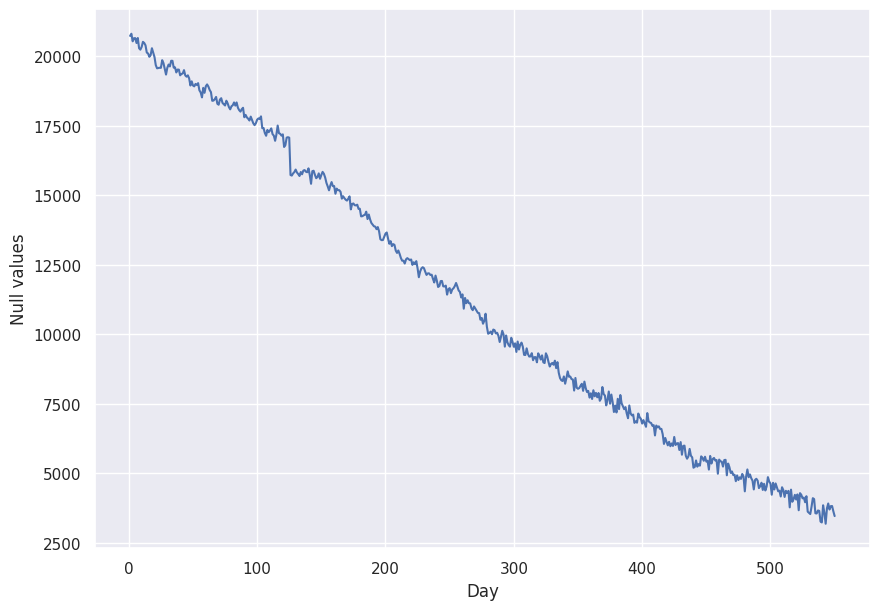

In [ ]:
days = [r for r in range(1, len(train.columns))]
plot.figure(figsize=(10,7))
plot.xlabel('Day')
plot.ylabel('Null values')
plot.plot(days, train.isnull().sum()[1:])

A

From the above plot it is evident that the no. of Null values reduce overtime. We can say that initially these pages were not created so they don't have any views.

We are dropping the rows having all NULL values first and then dropping the rows having more than 300 values as NULL becuase we have a total of 551 records, if we have more than 300 NULLs it means half of our data is NULL and that would not help in model creation.

In [ ]:
print(train.shape)
train=train.dropna(how='all')
#‘all’ : If all values are NA, drop that row or column.
print(train.shape)

train=train.dropna(thresh=300)
print(train.shape)

(145063, 551)
(145063, 551)
(133617, 551)


We haven't lost much data after the removal of NULLs so we can proceed with the cleaned data now.

Filling all the remaining NULLs with 0

In [ ]:
train=train.fillna(0)

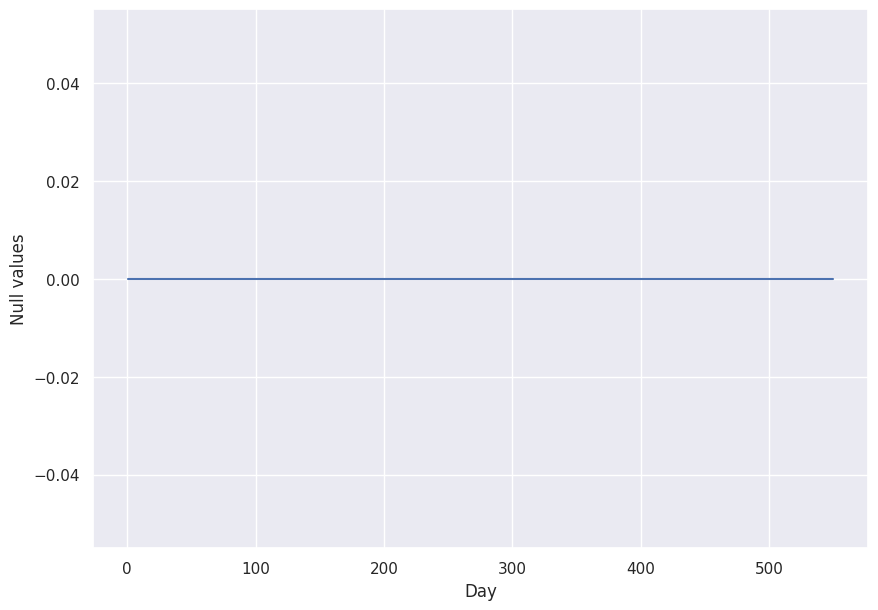

In [ ]:
days = [r for r in range(1, len(train.columns))]
plot.figure(figsize=(10,7))
plot.xlabel('Day')
plot.ylabel('Null values')
plot.plot(days, train.isnull().sum()[1:])

# **EDA**

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

We will split the data given in the page name column to find out the different parts of the data.

In [ ]:
def split_page(page):
  w = re.split('_|\.', page)
  return ' '.join(w[:-5]), w[-5], w[-2], w[-1]

li = list(train.Page.apply(lambda x: split_page(str(x))))
df = pd.DataFrame(li)
df.columns = ['Title', 'Language', 'Access_type','Access_origin']
df = pd.concat([train, df], axis = 1)

In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.britanica.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.britanica.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.britanica.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.britanica.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
5,5566_zh.britanica.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,A'N'D,zh,all-access,spider


We have got 4 new columns after spliting the Page column - Title, Language, Access_type, Access_origin

<Axes: xlabel='count', ylabel='Language'>

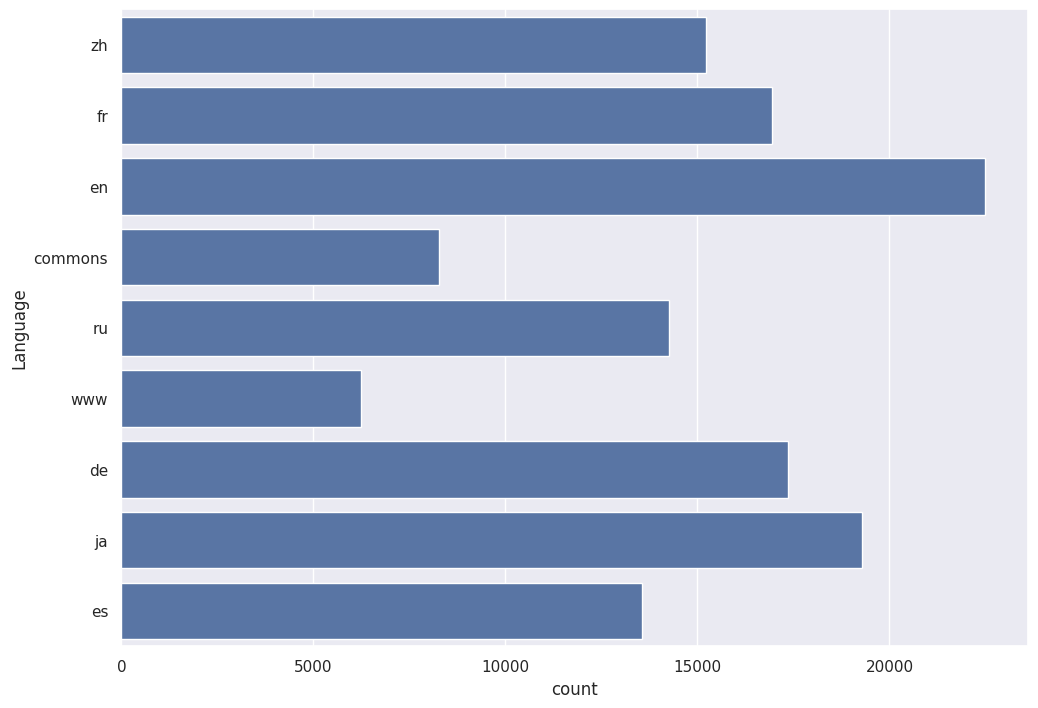

In [ ]:
sns.countplot(df["Language"])

<Axes: xlabel='count', ylabel='Access_type'>

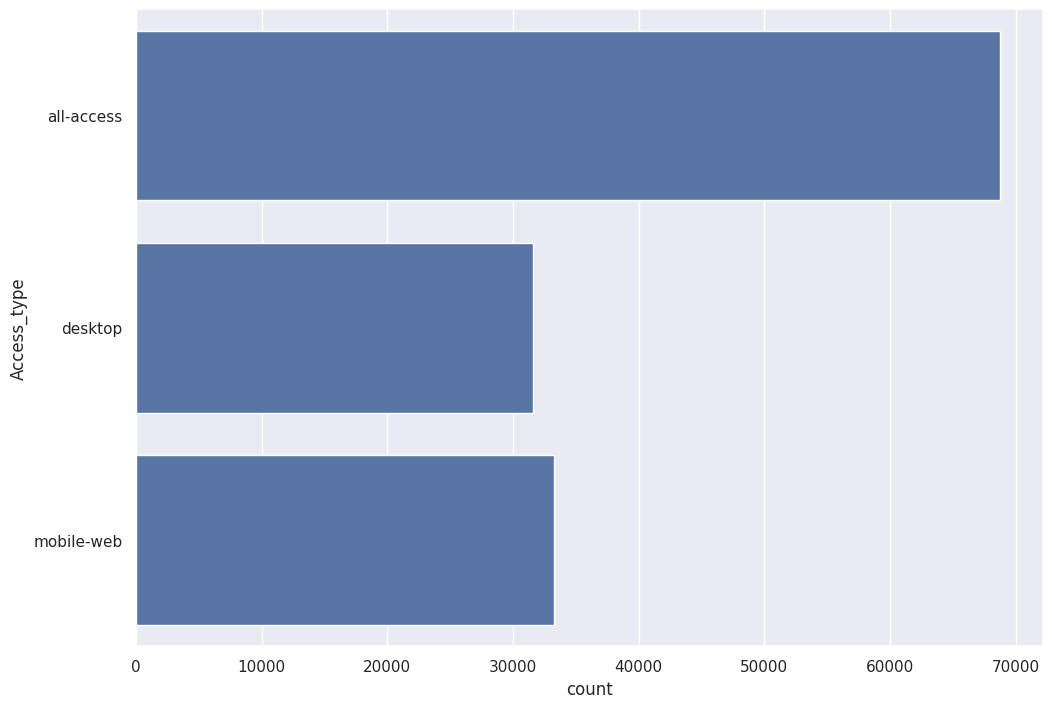

In [ ]:
sns.countplot(df["Access_type"])

<Axes: xlabel='count', ylabel='Access_origin'>

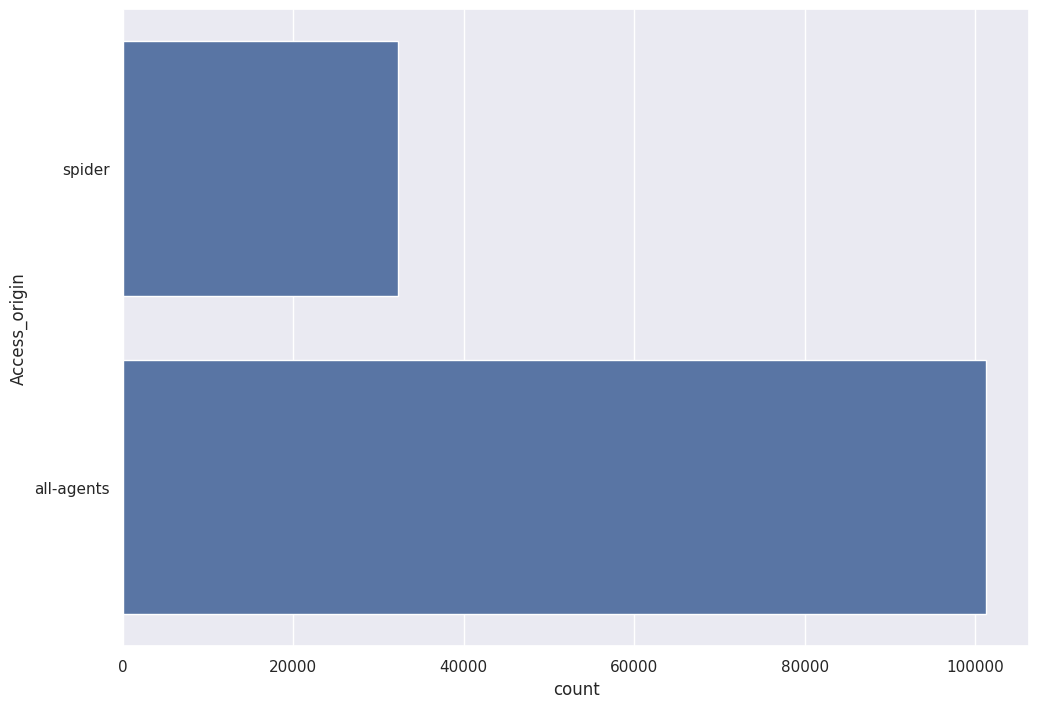

In [ ]:
sns.countplot(df["Access_origin"])

Let's explore the languages more. We have found lots of records for "commons".
Let's check it and see if they can be further splitted into any language or not

In [ ]:
df[df["Language"] == "commons"]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
12271,Burning_Man_en.britanica.org_desktop_all-agents,1693.0,1490.0,1186.0,1099.0,1051.0,1968.0,1874.0,1637.0,1842.0,...,940.0,2976.0,2447.0,1648.0,1282.0,956.0,Accueil,commons,all-access,spider
12272,Cali_Cartel_en.britanica.org_desktop_all-agents,348.0,363.0,214.0,252.0,257.0,320.0,340.0,345.0,432.0,...,1197.0,1449.0,1376.0,1350.0,1287.0,992.0,Atlas of Asia,commons,all-access,spider
12273,Call_of_Duty:_Modern_Warfare_2_en.britanica.or...,806.0,768.0,700.0,725.0,723.0,823.0,849.0,731.0,833.0,...,818.0,929.0,892.0,878.0,893.0,712.0,Atlas of Europe,commons,all-access,spider
12274,Calvin_Harris_en.britanica.org_desktop_all-agents,7114.0,5599.0,7685.0,15844.0,9390.0,7173.0,5499.0,6367.0,5630.0,...,1242.0,1409.0,1714.0,1604.0,1602.0,1300.0,Atlas of World War II,commons,all-access,spider
12275,Carl_Sagan_en.britanica.org_desktop_all-agents,1808.0,1759.0,1838.0,1631.0,1701.0,2230.0,2052.0,2065.0,2002.0,...,1425.0,1730.0,1858.0,1781.0,1718.0,1345.0,Atlas of colonialism,commons,all-access,spider
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,File:Zyworodka - Kalanchoe daigremontiana JPG,commons,desktop,all-agents
75150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Commons:Open proxy detection,commons,desktop,all-agents
75178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,File:Crabs (Pachygrapsus marmoratus) webm,commons,desktop,all-agents
75237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Басты бет,commons,desktop,all-agents


In [ ]:
df[df["Language"] == "www"]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
17850,Китайский_Новый_год_ru.britanica.org_mobile-we...,27.0,20.0,23.0,37.0,27.0,26.0,34.0,31.0,30.0,...,714.0,713.0,630.0,759.0,896.0,2261.0,API,www,all-access,all-agents
17851,"Шатунов,_Юрий_Васильевич_ru.britanica.org_mobi...",223.0,213.0,229.0,330.0,273.0,232.0,234.0,244.0,272.0,...,848.0,780.0,815.0,991.0,1002.0,31607.0,API:Account creation,www,all-access,all-agents
17852,Мёртвые_души_ru.britanica.org_mobile-web_all-a...,304.0,271.0,329.0,358.0,392.0,324.0,309.0,319.0,333.0,...,469.0,416.0,360.0,318.0,245.0,159.0,API:Allimages,www,all-access,all-agents
17853,"Ферт,_Колин_ru.britanica.org_mobile-web_all-ag...",221.0,221.0,192.0,237.0,249.0,220.0,235.0,200.0,249.0,...,325.0,307.0,325.0,330.0,324.0,225.0,API:Allpages,www,all-access,all-agents
17854,Анна_Иоанновна_ru.britanica.org_mobile-web_all...,281.0,229.0,263.0,263.0,322.0,283.0,268.0,257.0,251.0,...,616.0,601.0,540.0,511.0,407.0,355.0,API:Backlinks,www,all-access,all-agents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,RESTBase,www,all-access,spider
76578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Register globals,www,all-access,spider
76580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ResourceLoader/Default modules,www,all-access,spider
76610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Special:ListFiles,www,all-access,spider


In [ ]:
# Checking another way of fetching the language out of the string
def lang(Page):
    val = re.search('[a-z][a-z].britanica.org',Page)
    if val:
        #print(val)
        #print(val[0][0:2] )

        return val[0][0:2]

    return 'no_lang'

df['Language']=df['Page'].apply(lambda x: lang(str(x)))

<Axes: xlabel='count', ylabel='Language'>

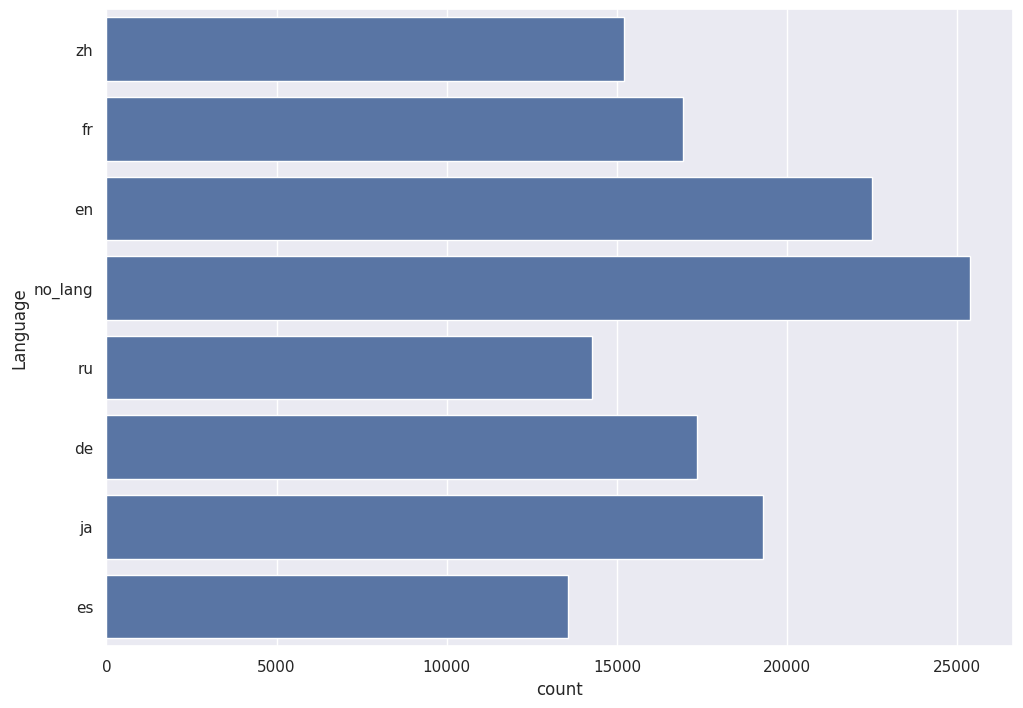

In [ ]:
sns.countplot(df["Language"])

Based on the language data we have, let's create a dataframe for languages and store the mean of those date wise and check how each language performs

In [ ]:
df_lang = df.groupby("Language").mean(numeric_only=True).transpose()
df_lang.head(10)

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713
2015-07-06,849.080636,4127.429067,1153.091801,528.072752,669.544493,110.188147,674.764681,293.490632
2015-07-07,823.422532,3906.341724,1123.942440,510.426481,651.298938,116.865600,659.297617,293.170337
2015-07-08,835.455305,3685.854621,1090.832190,501.033632,647.372428,121.979785,656.209530,300.824206
2015-07-09,804.329513,3771.183714,1070.245812,495.848124,631.090645,106.408928,672.200981,298.983433
2015-07-10,749.593653,3749.860313,972.952328,467.943179,655.678362,107.514834,769.787596,310.819736


In [ ]:
df_lang.reset_index(inplace=True)
df_lang.set_index('index', inplace=True)

Text(0, 0.5, 'Views per Page')

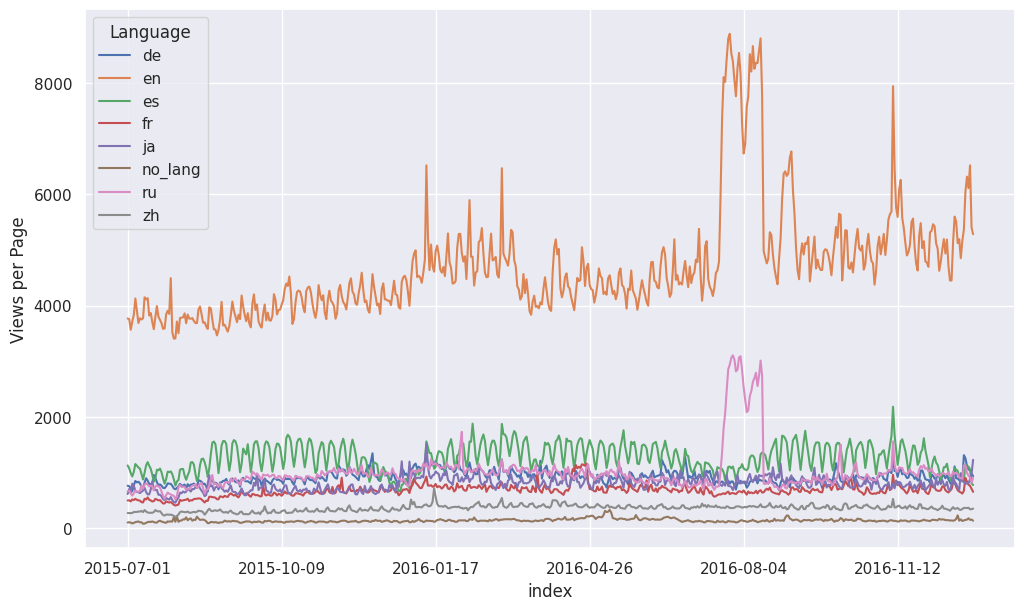

In [ ]:
df_lang.plot(figsize=(12,7))
plot.ylabel('Views per Page')

Looking at the above plot we can say that language - English is preferred over others. People view pages in English language way more than the rest.

Also there is a very interesting insight that there are some peaks in the data, especially if we look at 2016-08-04 in both en and ru language. To study about this in detail, we will look at the Exogenous data provided to us for en language.

Studying the patterns for Language - "en"

In [ ]:
df_en = df_lang["en"]
df_en.head()

,en
index,
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025


In [ ]:
df_en = df_lang["en"].to_frame().reset_index()

# Rename columns
df_en.columns = ["date", "views"]

df_en.set_index('date', inplace=True)

df_en.head()


,views
date,
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025


<Axes: xlabel='date'>

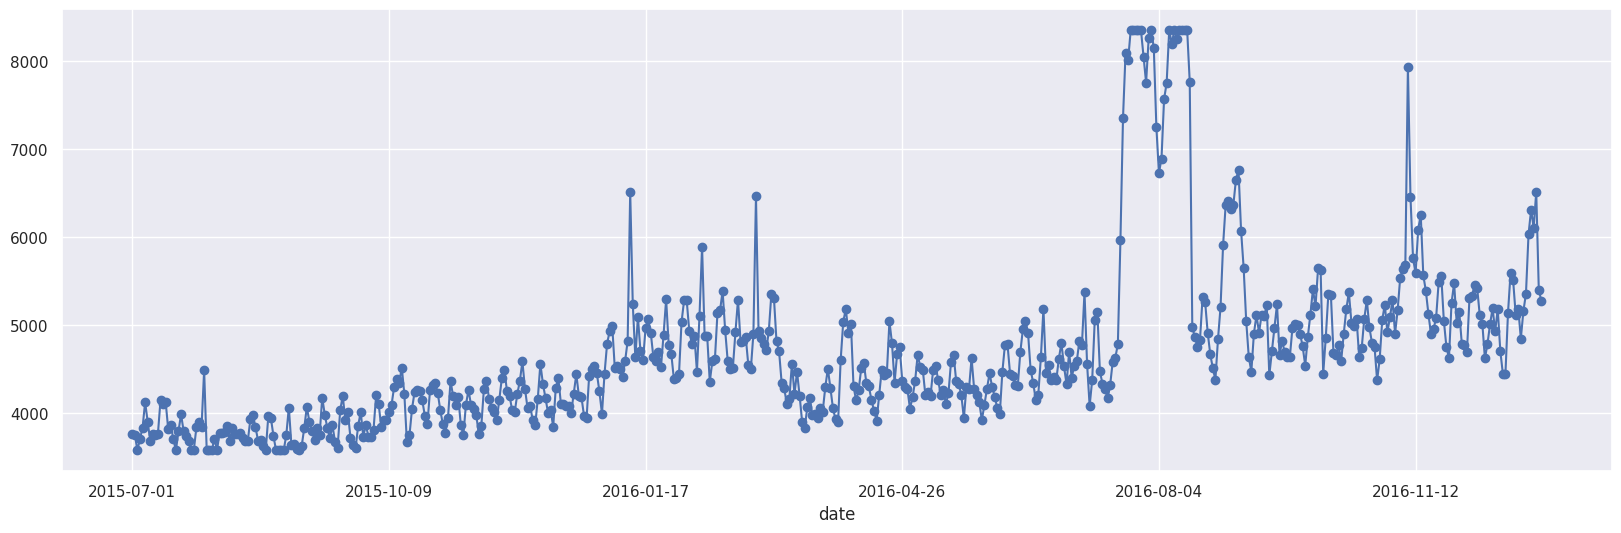

In [ ]:
# linear interpolation
df_en.views = df_en.views.interpolate(method='linear')

# anomalies - clip quantiles
df_en.views = df_en.views.clip(upper=df_en.views.quantile(0.98), lower=df_en.views.quantile(0.02))

# plot
df_en.views.plot(style='-o', figsize=(20,6))

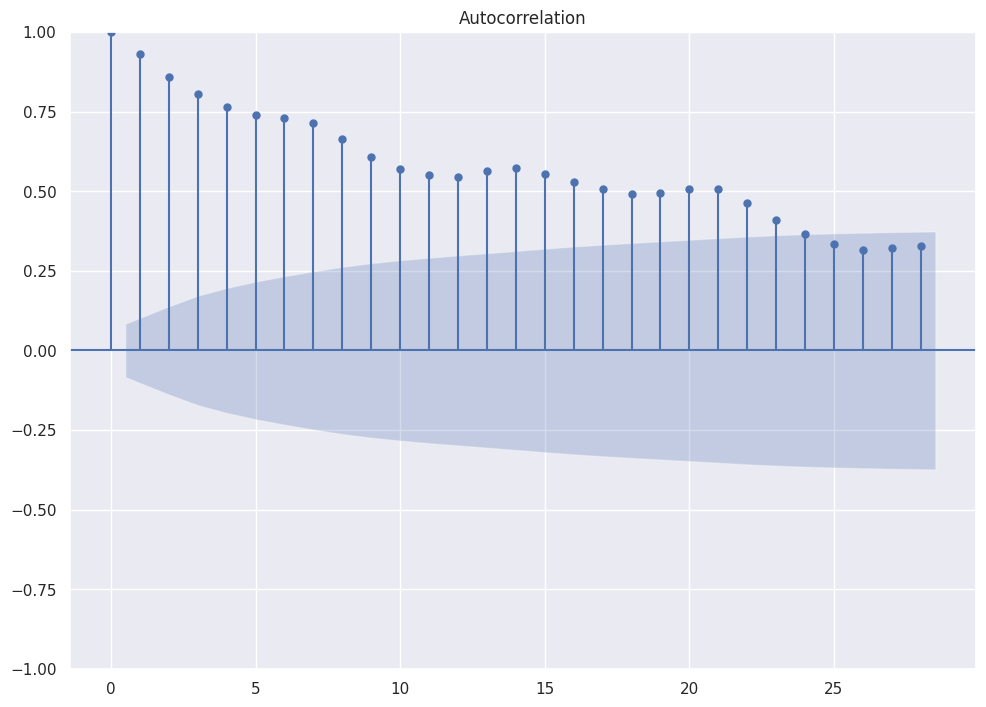

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_en.views);

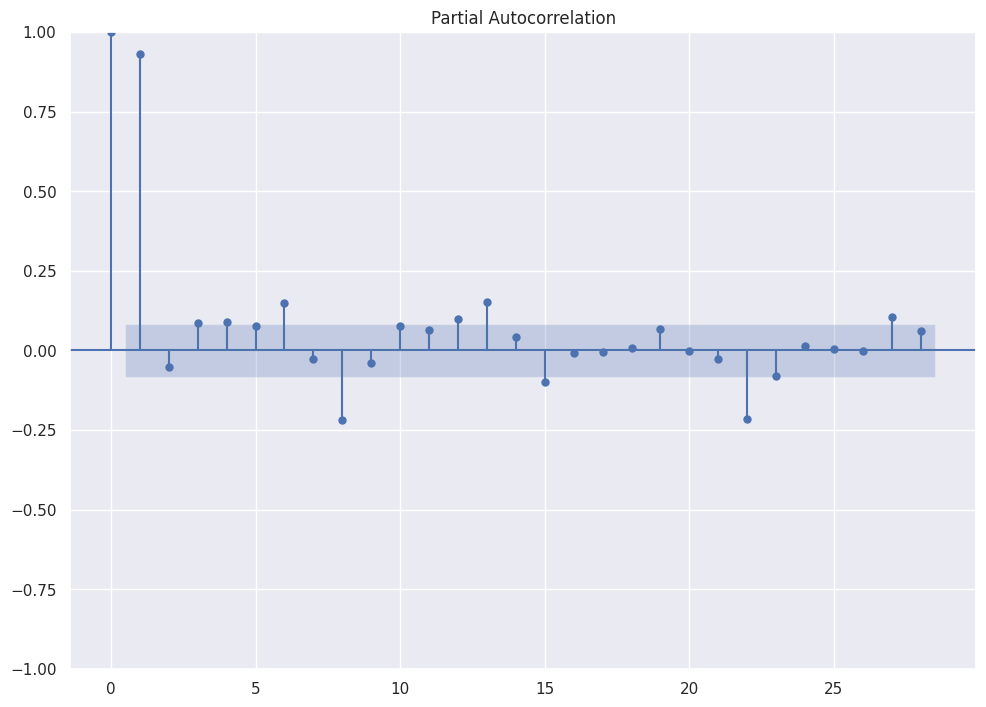

In [ ]:
plot_pacf(df_en.views);

Let's check if our TS is stationary or not with the help of Dickey Fuller Test

In [ ]:
import statsmodels.api as sm
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

adf_test(df_en.views)

Sequence is not stationary


As the TS is not stationary let's use differencing to make it stationary

In [ ]:
df_en_st = df_en.copy()
df_en_st.views = df_en_st.views.diff(1)
df_en_st.dropna(inplace=True)
adf_test(df_en_st.views)

Sequence is stationary


Differencing has worked here. The TS is now stationary and can be used for forecasting.

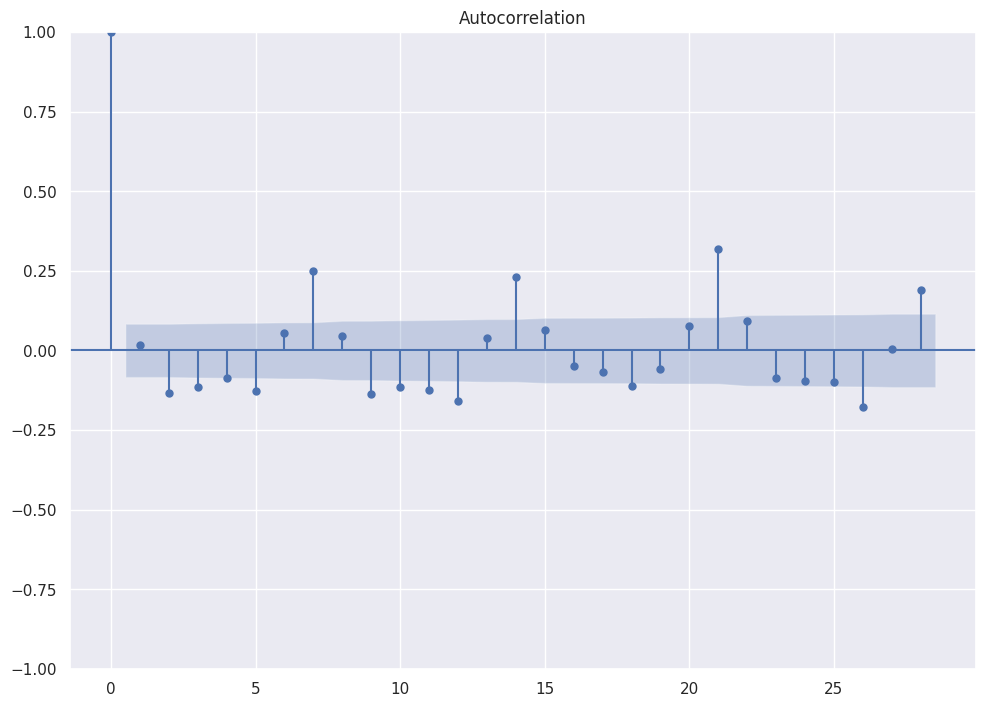

In [ ]:
plot_acf(df_en_st.views);

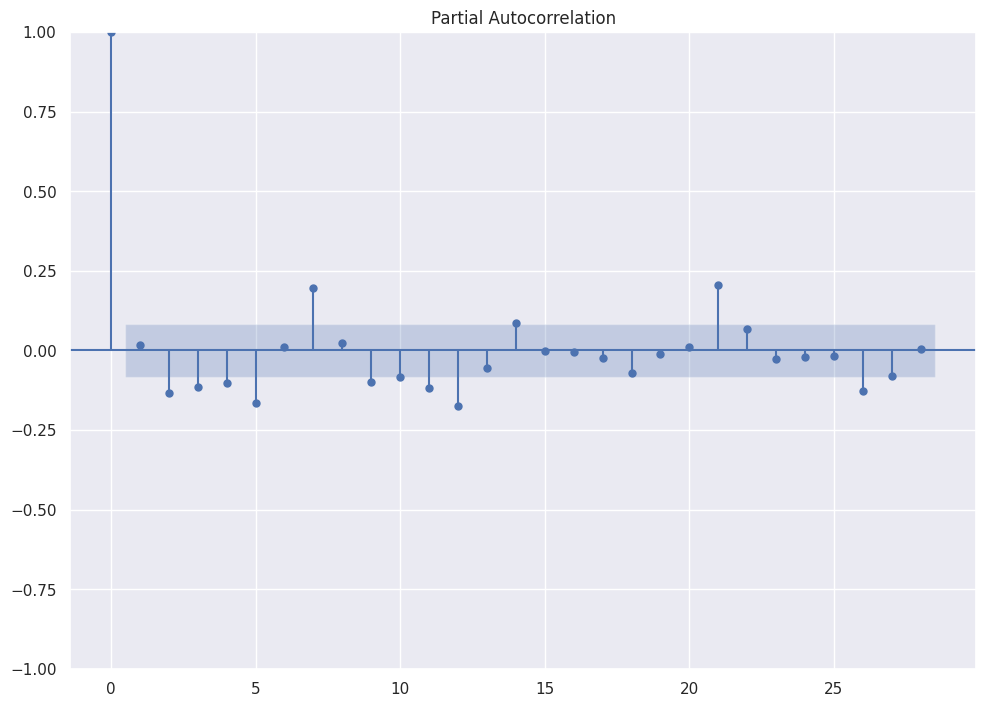

In [ ]:
plot_pacf(df_en_st.views);

# **ARIMA model**

In [ ]:
train = df_en[:-20]
test = df_en[-20:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


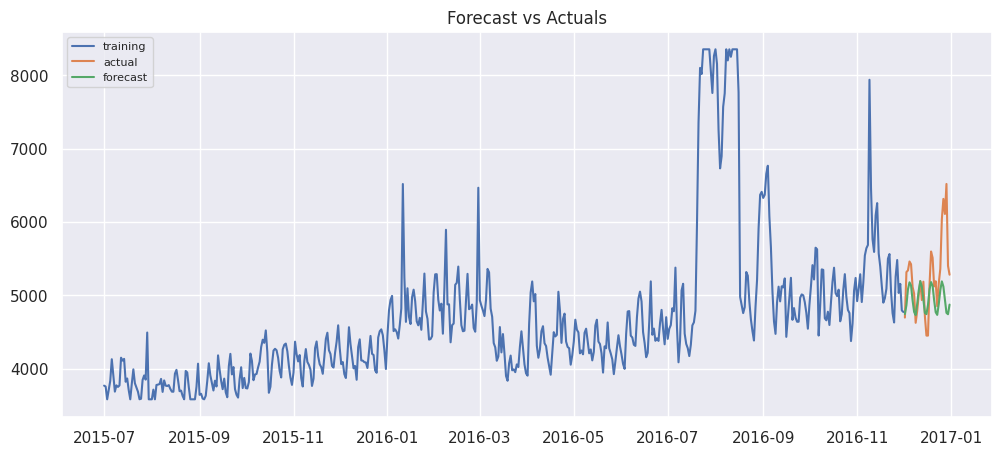

In [ ]:
import statsmodels.api as sm
train=df_en[:520]
test=df_en[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(4, 1, 3))
results=model.fit()

fc=results.forecast(30,dynamic=True)

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [ ]:
mape = np.mean(np.abs(fc - test.views)/np.abs(test.views))
rmse = np.mean((fc - test.views)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.06798136076869131
rsme: 542.7231365227891


# **Using exog in SARIMAX**

In [ ]:
ex=exog['Exog'].to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


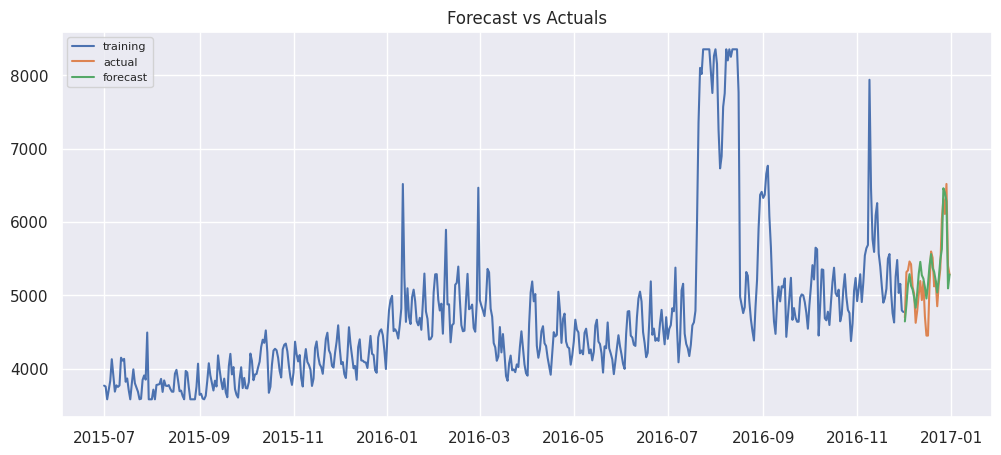

In [ ]:

train=df_en[:520]
test=df_en[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(4, 1, 3),seasonal_order=(1,1,1,7),exog=ex[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(ex[520:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
mape = np.mean(np.abs(fc - test.views)/np.abs(test.views))
rmse = np.mean((fc - test.views)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.04316981881816547
rsme: 272.49419648662285


# **FB Prophet**

In [ ]:
!pip uninstall fbprophet -y
!pip install prophet

In [ ]:
df_en

,views
date,
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3580.822233
2015-07-04,3711.782932
2015-07-05,3833.433025
...,...
2016-12-27,6314.335275
2016-12-28,6108.874144
2016-12-29,6518.058525


In [ ]:
exog

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


FB prophet without using exogenous variable

In [ ]:
df2 = df_en.copy()

In [ ]:
df2 = df2.reset_index()

In [ ]:
df2.rename(columns={'date': 'ds', 'views': 'y'}, inplace=True)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmxp_pjmm/pv4rb56a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmxp_pjmm/f2ys63oo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87794', 'data', 'file=/tmp/tmpmxp_pjmm/pv4rb56a.json', 'init=/tmp/tmpmxp_pjmm/f2ys63oo.json', 'output', 'file=/tmp/tmpmxp_pjmm/prophet_modelfjmluka9/prophet_model-20241226114606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


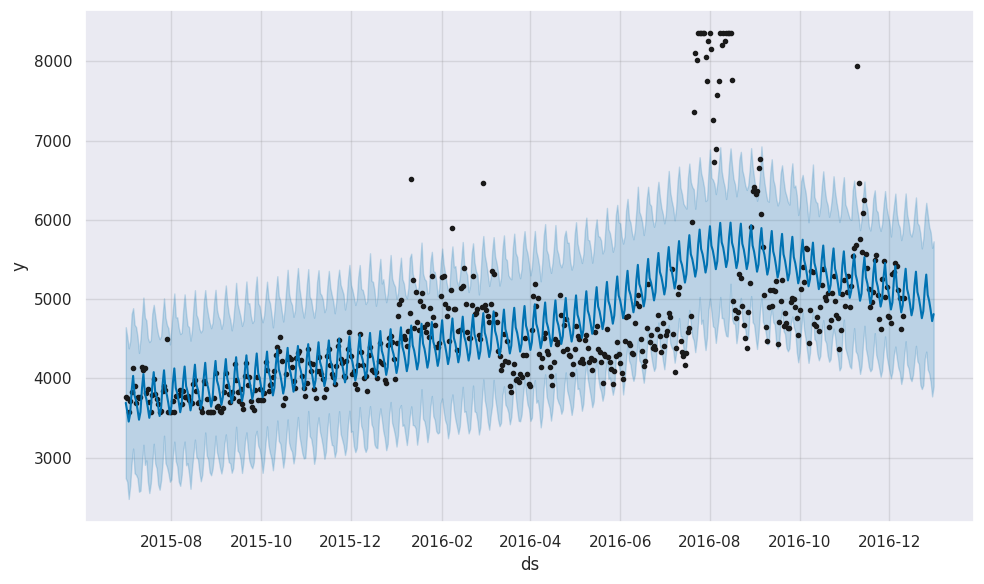

In [ ]:
from prophet import Prophet
m = Prophet(weekly_seasonality=True)
m.fit(df2[['ds', 'y']][:-20])
future = m.make_future_dataframe(periods=20,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

FB prophet with exogenous variable

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmxp_pjmm/_0j86n3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmxp_pjmm/68zravpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72042', 'data', 'file=/tmp/tmpmxp_pjmm/_0j86n3m.json', 'init=/tmp/tmpmxp_pjmm/68zravpl.json', 'output', 'file=/tmp/tmpmxp_pjmm/prophet_model6j7jhcmb/prophet_model-20241226114609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


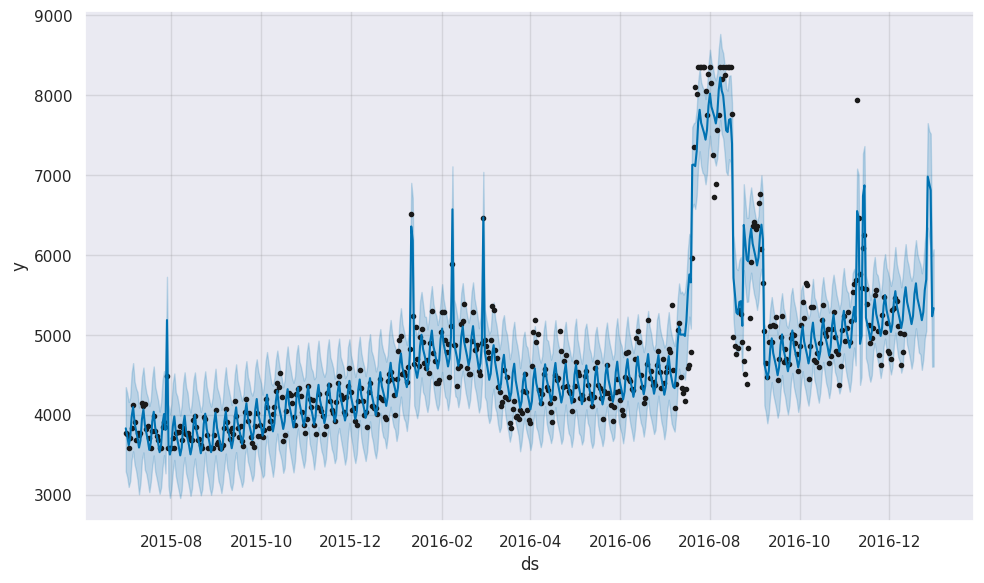

In [ ]:
df2['exog'] = exog
model2=Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1)
model2.add_regressor('exog')
model2.fit(df2[:-20])
forecast2 = model2.predict(df2)
fig = model2.plot(forecast2)

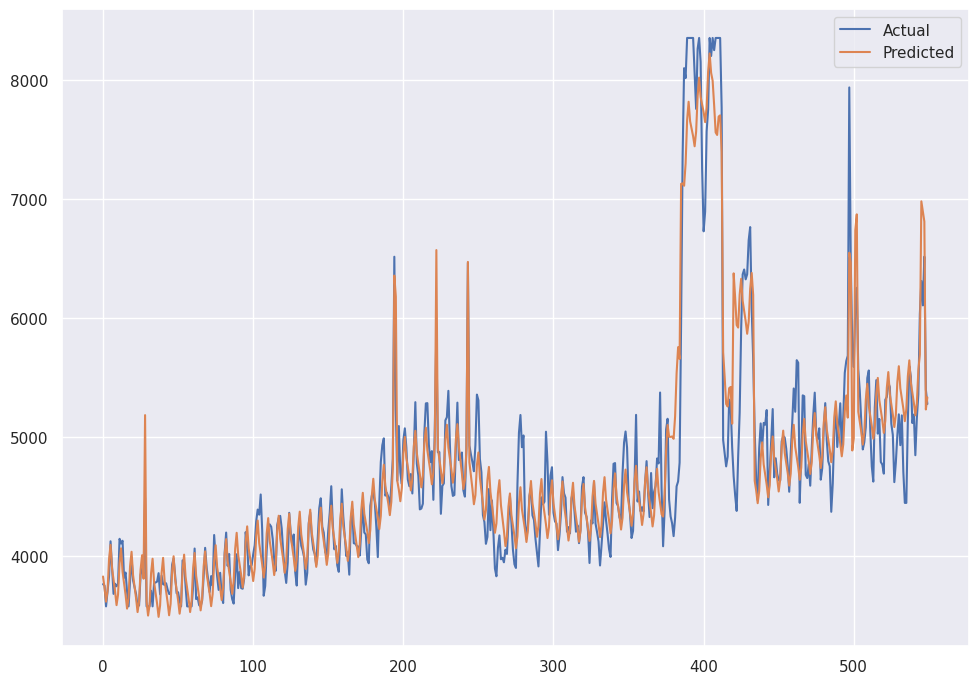

In [ ]:
y_true = df2['y'].values
y_pred = forecast2['yhat'].values

plot.plot(y_true, label='Actual')
plot.plot(y_pred, label='Predicted')
plot.legend()
plot.show()

In [ ]:
mape = np.mean(np.abs(forecast2['yhat'][-20:] - df2['y'][-20:].values)/np.abs(df2['y'][-20:].values))
print("mape:",mape)

mape: 0.06568044639394752


# **Conclusion**
SARIMAX is performing better in comparision to ARIMA or FB prophet.

We can easily see that there is Seasonality and Trend in the data.

Differencing of 1 lap is required in the data.

The value of PDQ and PDQS is choosen after multiple tries.

# **Recommendations based on MAPE & mean_visits:**
 English language is a clear winner. Maximum advertisement should be done on
 English pages. Their MAPE is low & mean visits are high.

 Chinese language has lowest number of visits. Advertisements on these pages
 should be avoided unless business has specific marketing strategy for Chinese
 populations.

 Russian language pages have decent number of visits and low MAPE. If used
 properly, these pages can result in maximum conversion.

 Spanish language has second highest number of visits but their MAPE is highest.
 There is a possibility advertisements on these pages won't reach the final people.

 French, German & Japenese have medium level of visits & medium MAPE levels.

 Depending on target customers advertisements should be run on these pages.

# **Questionnaire**

 1. Defining the problem statements and where can this and modifications of this be
 used?
 We are working in the Data Science team of Ad ease trying to understand the per
 page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. We are provided with the data of 145k wikipedia pages and daily view count for each of them. Our clients belong to different regions and need data on how their ads will perform on pages in different languages.
 By creating a proper forecasting model to predict the fluctuations of visits on pages,
 we can help the business team to optimise the marketing spend. If we can predict
 the days with higher visits properly, the business will run the ads for those specific
 days and still be able to reach wider audience with most optimized spend.



 2. Write 3 inferences you made from the data visualizations.

 There are 7 Languages found based on data provided. English has highest
 number of pages followed by Japense, German & French.
 There are 3 Access types : All-access(51.4%), mobile-web (24.9%) and
 desktop(23.6%).
 There are 2 Access-origins: all-agents (75.8%) and spider (24.2%).
 English language is a clear winner. Maximum advertisement should be done on
 English pages. Their MAPE is low & mean visits are high.
 Chinese language has lowest number of visits. Advertisements on these pages
 should be avoided unless business has specific marketing strategy for Chinese
 populations.
 Russian language pages have decent number of visits and low MAPE. If used
 properly, these pages can result in maximum conversion.
 Spanish language has second highest number of visits but their MAPE is highest.
 There is a possibility advertisements on these pages won't reach the final people.
 French, German & Japenese have medium level of visits & medium MAPE levels.
 Depending on target customers advertisements should be run on these pages.



 3. What does the decomposition of series do?

The decomposition of time series is a statistical task that deconstructs a time series
 into several components, each representing one of the underlying categories of
 patterns.
 There are two principal types of decomposition : Additive & Multiplicative.
 In present business case we have used Additive Model for deconstructing the time
 series.


 4. What level of differencing gave you a stationary series?

A non-stationary time series can be converted to a stationary time series through a
 technique called differencing. Differencing series is the change between consecutive
 data points in the series.

 In some cases, just differencing once will still yield a nonstationary time series. In
 that case a second order differencing is required.
 Seasonal differencing is the change between the same period in two different
 seasons. Assume a season has period, m
 -
yt yt−m
 Once the time series becomes stationary, no differencing is required.



 5. Difference between arima, sarima & sarimax.


 The ARIMA model is an ARMA model yet with a preprocessing step included in the
 model that we represent using I(d). I(d) is the difference order, which is the number
 of transformations needed to make the data stationary. So, an ARIMA model is
 simply an ARMA model on the differenced time series.

 In SARIMA models there is an additional set of autoregressive and moving average
 components.The additional lags are offset by the frequency of seasonality (ex. 12 —
 monthly, 24 — hourly). SARIMA models allow for differencing data by seasonal
 frequency, yet also by non-seasonal differencing.
 Equation of SARIMA model can be represented as below:
 SARIMAX model takes into account exogenous variables, or in other words, use
 external data in our forecast. Some real-world examples of exogenous variables
 include gold price, oil price, outdoor temperature, exchange rate.


 6. Compare the number of views in different languages


 Mean number of views (Popularity sequence) of various languages have the
 following :
 English > Spanish > Russian > German > Japenese > French > Chinese


 7. What other methods other than grid search would be suitable to get the model
 for all languages?


 Deep understanding of Domain / Business or relevant experience in the same
 field can be good starting point for estimating the parameters of the model
 intiuitavely.

 Second level estimation can come from ACF & PACF plots of the time series. We
 can take following steps for estimation of p, q, d:

 Test for stationarity using the augmented dickey fuller test.

 If the time series is stationary try to fit the ARMA model, and if the time series is
 non-stationary then seek the value of d.

 If the data is getting stationary then draw the autocorrelation and partial
 autocorrelation graph of the data.

 Draw a partial autocorrelation graph(ACF) of the data. This will help us in finding
 the value of p because the cut-off point to the PACF is p.

 Draw an autocorrelation graph(ACF) of the data. This will help us in finding the
 value of q because the cut-off point to the ACF is q

In [ ]:
!apt-get install pandoc
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!jupyter nbconvert --to pdf /content/AdEase_Casestudy.ipynb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
